## getting all the libraries 

In [51]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

### importing the data 

In [52]:
# Load data
d = pd.read_csv("NYC Accidents 2020.csv")


# getting the columns 
columns_of_interest = ["CRASH TIME", "ZIP CODE", "LATITUDE", "LONGITUDE", "COLLISION_ID", "BOROUGH"]
data = d[columns_of_interest]

# printing the to 5 rows 
data.head()


,CRASH TIME,ZIP CODE,LATITUDE,LONGITUDE,COLLISION_ID,BOROUGH
0,15:40:00,10466.0,40.89210,-73.833760,4342908,BRONX
1,21:00:00,11221.0,40.69050,-73.919914,4343555,BROOKLYN
2,18:20:00,NaN,40.81650,-73.946556,4343142,NaN
3,00:00:00,10459.0,40.82472,-73.892960,4343588,BRONX
4,17:10:00,11203.0,40.64989,-73.933890,4342953,BROOKLYN


#### changing the Time column 

In [53]:
data['CRASH TIME'] = [datetime.strptime(x, '%H:%M:%S') for x in data['CRASH TIME']]
data['CRASH TIME'] = [x.hour * 3600 + x.minute * 60 + x.second for x in data['CRASH TIME']]

/var/folders/lg/b9vtb_xx1qv8jkcb20xprp600000gn/T/ipykernel_2054/2102829205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CRASH TIME'] = [datetime.strptime(x, '%H:%M:%S') for x in data['CRASH TIME']]
/var/folders/lg/b9vtb_xx1qv8jkcb20xprp600000gn/T/ipykernel_2054/2102829205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CRASH TIME'] = [x.hour * 3600 + x.minute * 60 + x.second for x in data['CRASH TIME']]


The first line of code uses a list comprehension and the datetime.strptime function to convert each string in the CRASH TIME column to a datetime object. The '%H:%M:%S' format string specifies that the input string should be interpreted as hours, minutes, and seconds.

The second line of code then uses another list comprehension to convert each datetime object to the total number of seconds since midnight, which is calculated as the hour (0-23) multiplied by the number of seconds in an hour (3600), plus the minute (0-59) multiplied by the number of seconds in a minute (60), plus the second (0-59).

By converting the CRASH TIME column to a numerical format representing the number of seconds since midnight, this code makes it possible to use this column as a feature in a machine learning model.

#### Null values check 

In [54]:
# check for thge missing values 
print(data.isnull().sum())

CRASH TIME          0
ZIP CODE        25747
LATITUDE         5946
LONGITUDE        5946
COLLISION_ID        0
BOROUGH         25741
dtype: int64


In [55]:
# clear the missing values 
data = data.dropna()

# Check for missing values
print(data.isnull().sum())

CRASH TIME      0
ZIP CODE        0
LATITUDE        0
LONGITUDE       0
COLLISION_ID    0
BOROUGH         0
dtype: int64


## First machine learning model LinearRegression

In [56]:
# Convert BOROUGH column to numerical format using LabelEncoder
le = LabelEncoder()
data['BOROUGH'] = le.fit_transform(data['BOROUGH'])

# Create feature matrix and target vector
X = data.drop(columns=["BOROUGH"])
y = data["BOROUGH"]

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model and make predictions
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [57]:
# Evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-Squared Score:", r2)


Mean Squared Error: 1.2168543051505585
R-Squared Score: 0.09484229870539262


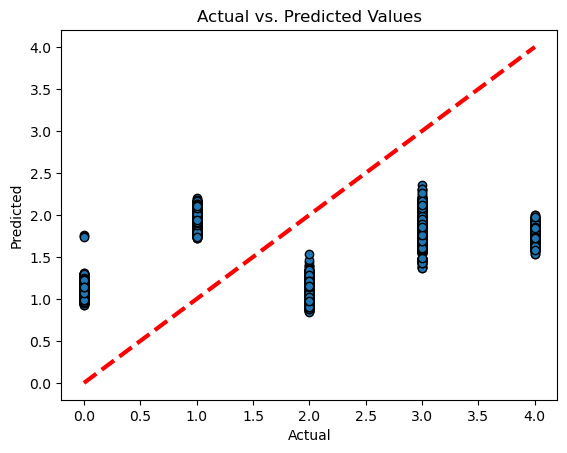

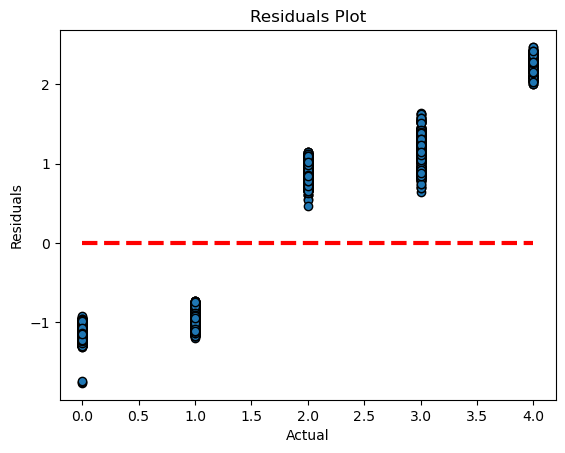

In [58]:
# Plot actual vs predicted values
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Actual vs. Predicted Values')
plt.show()

# Plot residuals
fig, ax = plt.subplots()
ax.scatter(y_test, y_test - y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [0, 0], 'r--', lw=3)
ax.set_xlabel('Actual')
ax.set_ylabel('Residuals')
ax.set_title('Residuals Plot')
plt.show()


The first plot shows the actual versus predicted values, with a line indicating a perfect match. The second plot shows the residuals, which are the differences between the actual and predicted values. The residuals should be normally distributed around zero if the model is a good fit.

You can customize these plots to your liking, and you can also create additional visualizations to better understand your model's performance.

# second code RandomForestClassifier

In [59]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model and make predictions
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [60]:
# Evaluate model performance
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)

Accuracy: 0.9995810640971932
Confusion Matrix:
 [[1768    0    0    0    0]
 [   0 3304    0    0    0]
 [   0    0 1459    0    0]
 [   0    4    0 2755    0]
 [   0    0    0    0  258]]


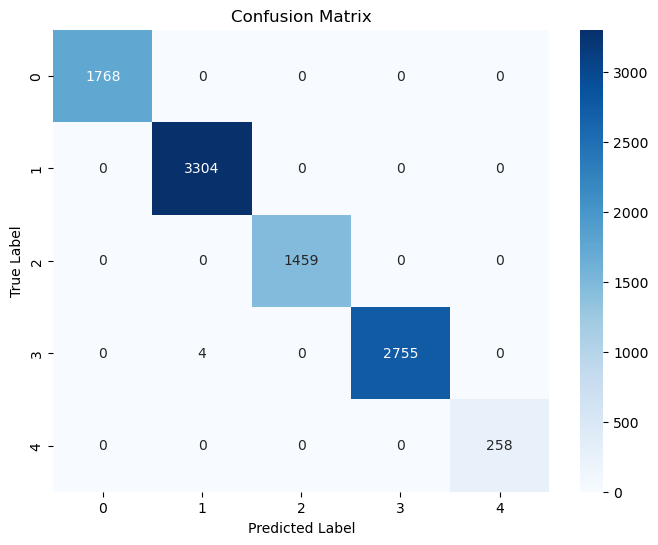

In [61]:
# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

The confusion_matrix function from sklearn.metrics is used to calculate the confusion matrix based on the predicted and true labels. The sns.heatmap function is used to plot the confusion matrix as a heatmap, with the predicted labels on the x-axis and the true labels on the y-axis. The annot=True parameter adds the numerical values to each cell of the heatmap, and the cmap="Blues" parameter sets the color scheme for the heatmap. Finally, the plt.title, plt.xlabel, and plt.ylabel functions are used to add labels to the plot.

In [62]:
X_test["pred_BOROUGH"]=y_pred
X_test["actual_BOROUGH"]=y_test

In [66]:
X_test

,CRASH TIME,ZIP CODE,LATITUDE,LONGITUDE,COLLISION_ID,pred_BOROUGH,actual_BOROUGH
5880,58860,10312.0,40.559044,-74.18024,4337290,4,4
790,82500,10459.0,40.822440,-73.88590,4342369,0,0
40447,48300,11236.0,40.647045,-73.91358,4300083,1,1
62623,43200,11226.0,40.651695,-73.94968,4279788,1,1
20305,47400,11423.0,40.721060,-73.75945,4323062,3,3
...,...,...,...,...,...,...,...
62833,36000,11101.0,40.741028,-73.93432,4279649,3,3
40311,71400,11238.0,40.683266,-73.96587,4299993,1,1
39328,44400,11215.0,40.672794,-73.98329,4302473,1,1
17740,28800,10456.0,40.838360,-73.91271,4324611,0,0
